In [1]:
import torch
import numpy as np 
import os
import sys
import numba as nb
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import time
import torch.optim as optim
from scipy import linalg

os.chdir('/home/baly/projects/sopt_shape')

In [2]:
from lib.library import *
from lib.lib_ot import *
from lib.sliced_opt import *
from lib.lib_shape import *


In [37]:
# do not run this one 
label='male'
data_list=torch.load('data/'+label+'_list.pt')
#data_list=np.array(data_list)
data_all={}

X=data_list[0] 
Y=data_list[-1]
n,d=X.shape


fig = plt.figure(figsize=(2*800/72,800/72))    
for n,i in enumerate(np.linspace(-.5,.5,5)):
    ax = fig.add_subplot(1, 5, n+1, projection='3d')
    data=data_list[n]
    x=data[:,0]
    y=data[:,1]
    z=data[:,2]
    ax.scatter3D(x, z, y, c=y*np.sqrt(x**2+z**2), cmap='bone')
    ax.set_xlim([-1,1]);ax.set_ylim([-1,1]);ax.set_zlim([-1,1])
    ax.view_init(10, 45)
plt.show()
data_all['0']=data_list


# generate 5% noisy data
n,d=X.shape
data_listY1=[]
eta=0.05
n_noise=int(n*eta)
fig = plt.figure(figsize=(2*800/72,800/72))   
for n,data in enumerate(data_list):

    noise=np.random.uniform(low=-1.5,high=1.5,size=(n_noise,d))
    data=np.concatenate((data,noise))
    x=data[:,0]
    y=data[:,1]
    z=data[:,2]
    if n<=4:
        ax = fig.add_subplot(1, 5, n+1, projection='3d')
        ax.scatter3D(x, z, y, c=y*np.sqrt(x**2+z**2), cmap='bone')
        ax.set_xlim([-1,1]);ax.set_ylim([-1,1]);ax.set_zlim([-1,1])
        ax.view_init(10, 45)
    data_listY1.append(data)
plt.show()

data_all[str(eta)]=data_listY1


# generate 10% noisy data
n,d=X.shape
data_listY1=[]
eta=0.10
n_noise=int(n*eta)
fig = plt.figure(figsize=(2*800/72,800/72))   
for n,data in enumerate(data_list):
    
    noise=np.random.uniform(low=-1.5,high=1.5,size=(n_noise,d))
    data=np.concatenate((data,noise))
    if n<=4:
        ax = fig.add_subplot(1, 5, n+1, projection='3d')
        x=data[:,0]
        y=data[:,1]
        z=data[:,2]
        ax.scatter3D(x, z, y, c=y*np.sqrt(x**2+z**2), cmap='bone')
        ax.set_xlim([-1,1]);ax.set_ylim([-1,1]);ax.set_zlim([-1,1])
        ax.view_init(10, 45)
    data_listY1.append(data)
plt.show()
data_all[str(eta)]=data_listY1

torch.save(data_all,'data/select_'+label+'.pt')


FileNotFoundError: [Errno 2] No such file or directory: 'data/n_list.pt'

In [ ]:
# do not run this one 
data_all=torch.load('data/select_'+label+'.pt')
for key in data_all:
    print(key)

In [10]:

@nb.njit()
def permutation_inverse(permutation):
    N=permutation.shape[0]
    Domain=np.arange(N)
    mapping=np.stack((Domain,permutation))
    mapping_final=mapping[0].take(mapping[1].argsort())
    return mapping_final

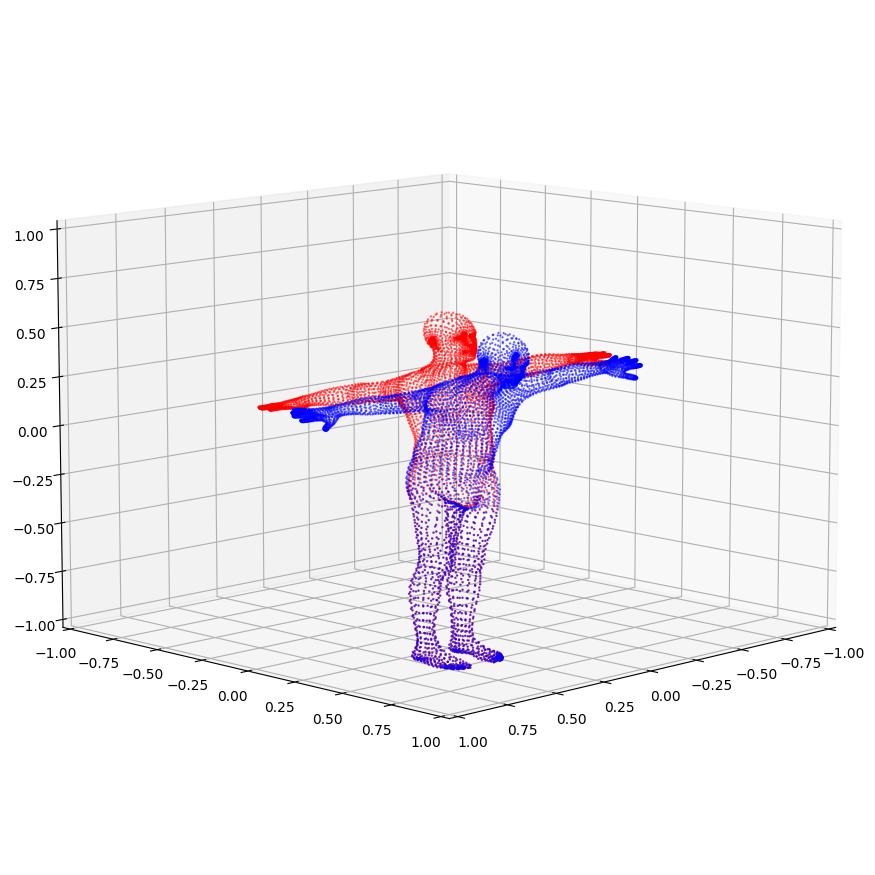

1.4571141423220866e-14
1.4571141423220866e-14
1.4571141423220866e-14


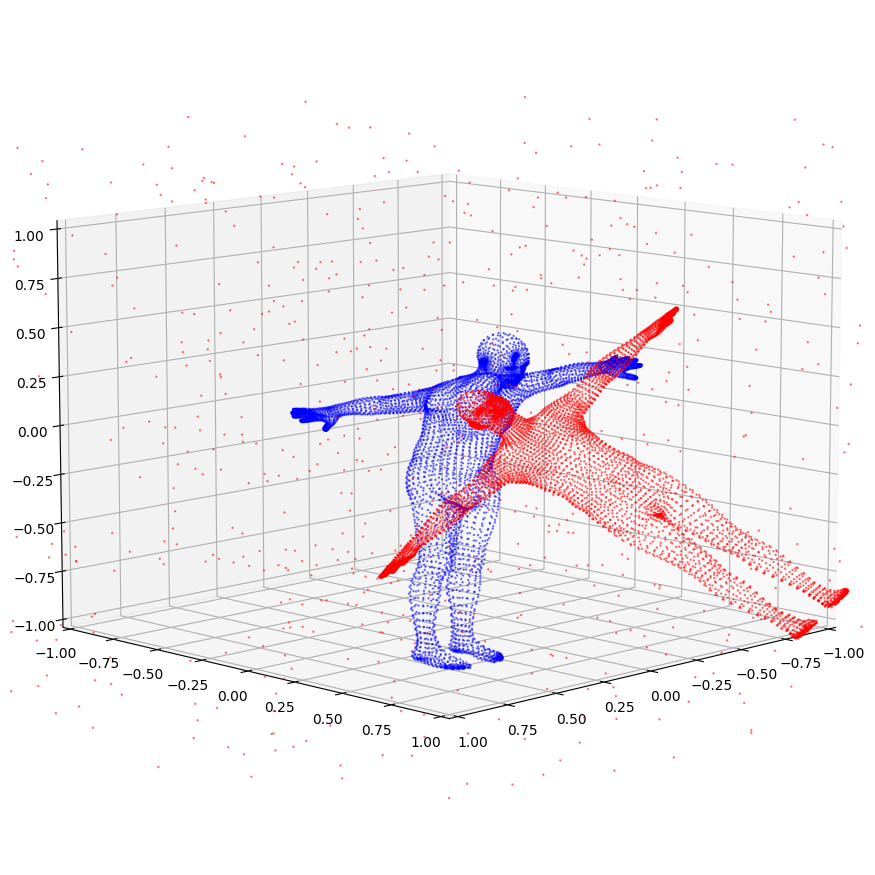

In [20]:
# do not run this cell 
# apply rotation and shift. 





In [ ]:
# load data 
i=49
j=2
label='male'
data=torch.load('data/%s_%d_%d.pt'%(label,i,j))
print(label)

In [ ]:
sigma2=0.001
n_projections=300

#C=X.copy()
#K=600 # # of centers
# our method
#@nb.njit()

method='sopt_Gaussian'

n_projections=400
middle_point=100
record_index1=np.linspace(0,middle_point,50).astype(np.int64)
record_index2=np.linspace(middle_point,n_projections-1,50).astype(np.int64)
record_index=np.unique(np.concatenate((record_index1,record_index2)))
record_index.sort()


for eta in [0,0.05,0.10]:
    print('label is %s,method is %s, eta is %0.2f'%(label,method,eta))
    X0=data['X0']
    N0=X0.shape[0]
    X=data['X'+str(eta)]
    Y=data['Y'+str(eta)]

    time_start=time.time()
    Yhat_list,_=main_Gaussian(X,Y,N0,n_projections=n_projections,sigma2=sigma2,record_index=record_index)
    time_end=time.time()
    result={}
    result['Yhat_list']=Yhat_list
    result['time']=time_end-time_start
    torch.save(result,'result/3D_%s/%s_%0.2f.pt'%(label,method,eta))
    print('done')

label is male,method is Gaussian, eta is 0.00


In [ ]:
print(eta)

In [ ]:
#### label='female'
result=torch.load('result/3D_%s/sopt_Gaussian_%0.2f.pt'%(label,eta))
#print(result)

data=torch.load('data/%s_%d_%d.pt'%(label,i,j))
eta=0

X0=data['X0']
N0=X0.shape[0]
X=data['X'+str(eta)]
Y=data['Y'+str(eta)]

Y_st=Y/np.std(Y,0)
#print(np.linalg.norm(Y_st))

error=np.linalg.norm((Yhat_list[-1][0:N0]-Y[0:N0])/np.std(Y[0:N0],0))/N0
print(error)


In [ ]:
print('test')
# print(np.std(Y,0))
# Y_st=Y/np.std(Y,0)
# print(np.std(Y_st))

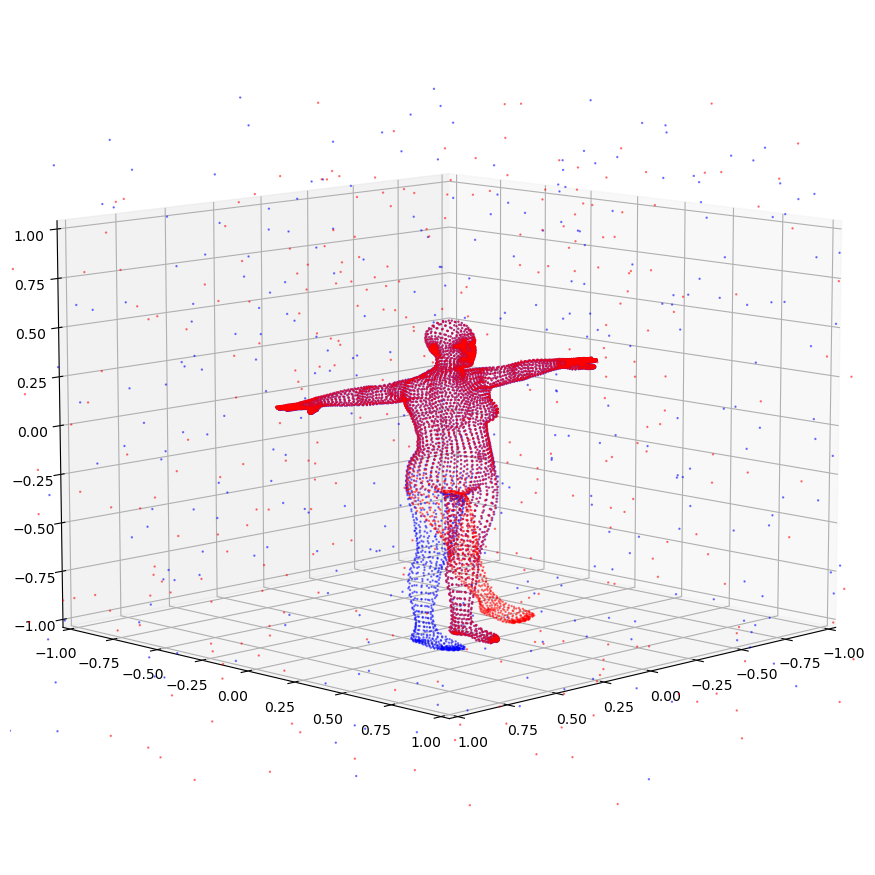

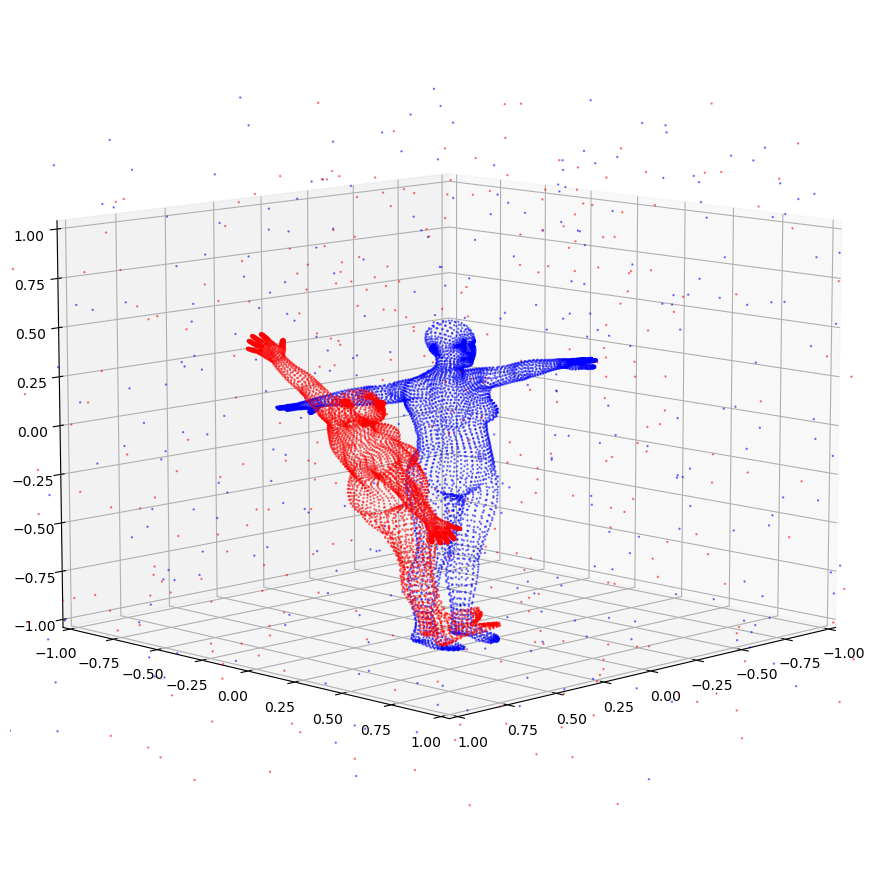

In [6]:
data=torch.load('data/woman1.pt')
i=0
j=2
X0=data['0'][i]
Y0=data['0'][j]
X1=data['0.05'][i]
Y1=data['0.05'][j]
N0=X0.shape[0]
make_plot(X1,Y1)
M=cost_matrix_d(X0,Y0)

theta_0=np.array([np.pi/5,np.pi/5,-np.pi/5])
rotation_0=rotation_in(theta_0)
beta_0=np.array([0.2,-0.2,-0.2])
S_0=1.0  
X2=X1.copy()
X2[0:N0]=X1[0:N0].dot(rotation_0)*S_0+beta_0

theta_op=-theta_0 #np.array([np.pi/6,np.pi/4,-np.pi/5])
rotation_op=rotation_re(theta_op)
#beta_0=0.3
S_op=1/S_0
beta_op=-S_op*beta_0.dot(rotation_op)
X3=X2.copy()
X3[0:N0]=X2[0:N0].dot(rotation_op)*S_op+beta_op


make_plot(X2,Y1)
#make_plot(X3,X1)


#print(X1.shape[0])
#eps=1e-4
#row_min=M.min(1)
#indices=np.where(row_min>eps)[0]
#n=indices.shape[0]
#print(n)
#make_plot(X0[indices],Y0[indices])


In [60]:
print('end')

end
